# Reconhecimento de texto em imagens de um diretório (busca por termos específicos)

- Buscar termos específicos
- Salvar os resultados em um arquivo.txt
- mostrar os resultados sobre a imagem e salvar as imagens processadas em uma nova pasta

In [2]:
import pytesseract
from pytesseract import Output
import numpy as np
import cv2
import os
import re
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

In [4]:
diretorio_img = "imagens_projeto1"

path = [os.path.join(diretorio_img, f) for f in os.listdir(diretorio_img)]
print(path)

['imagens_projeto1/artigo_introducao_vc.jpg', 'imagens_projeto1/prefacio_tanenbaum.jpg', 'imagens_projeto1/ebook_sistemasoperacionais.jpg', 'imagens_projeto1/referencias_artigo.jpg']


In [5]:
def show_images(img):
    fig = plt.gcf()
    fig.set_size_inches(20, 10)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

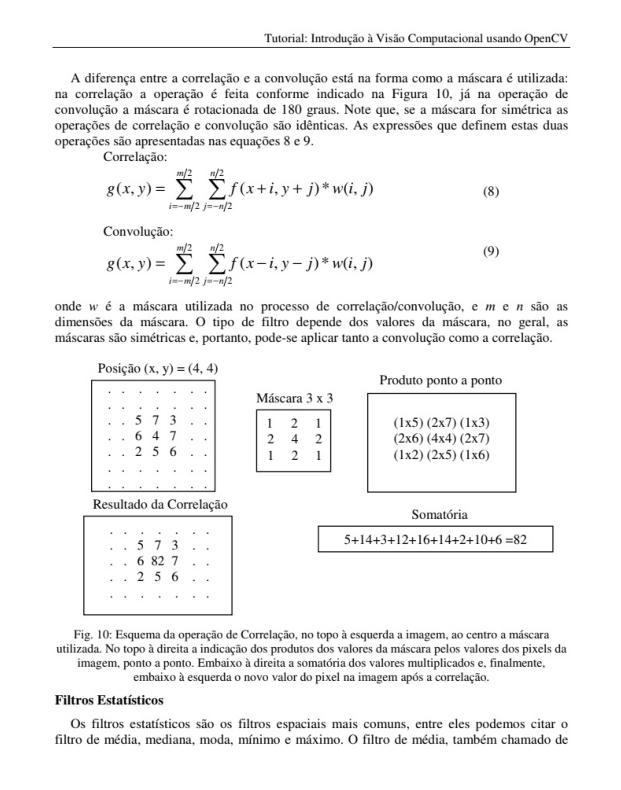

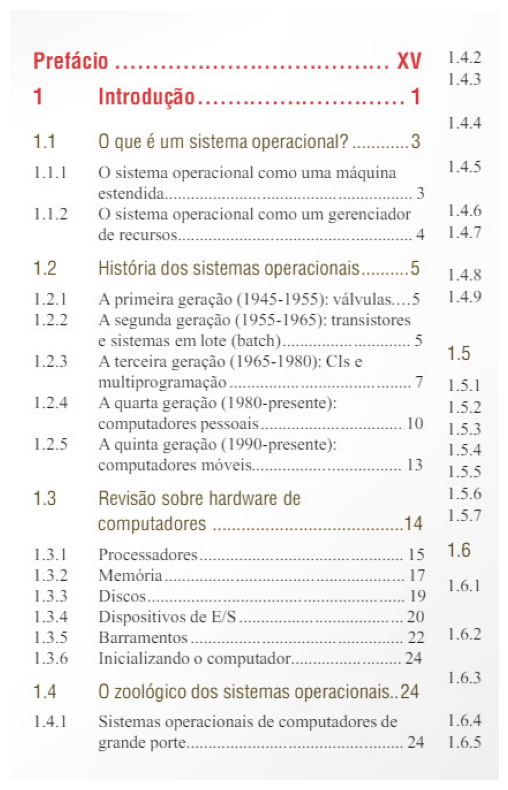

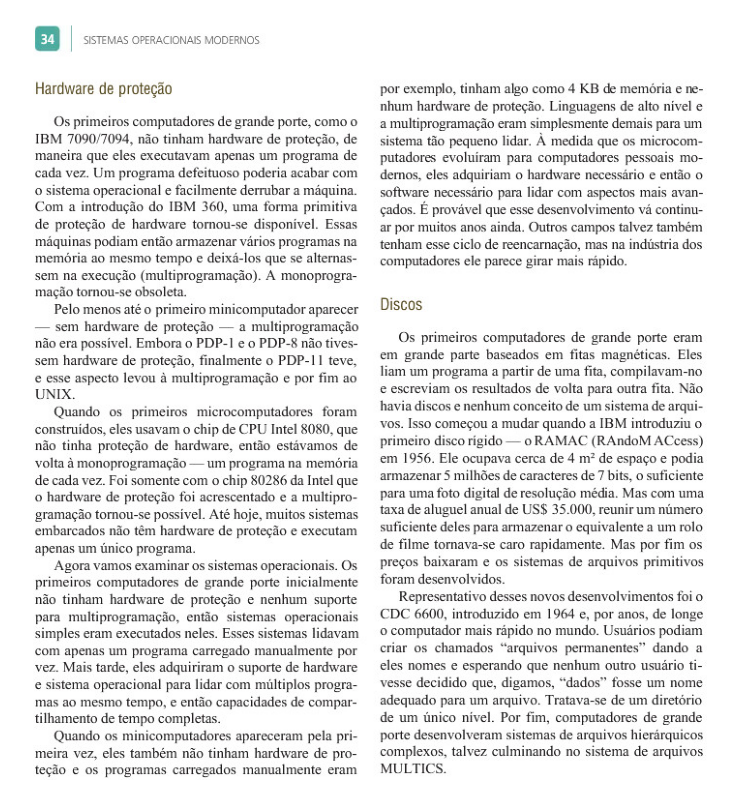

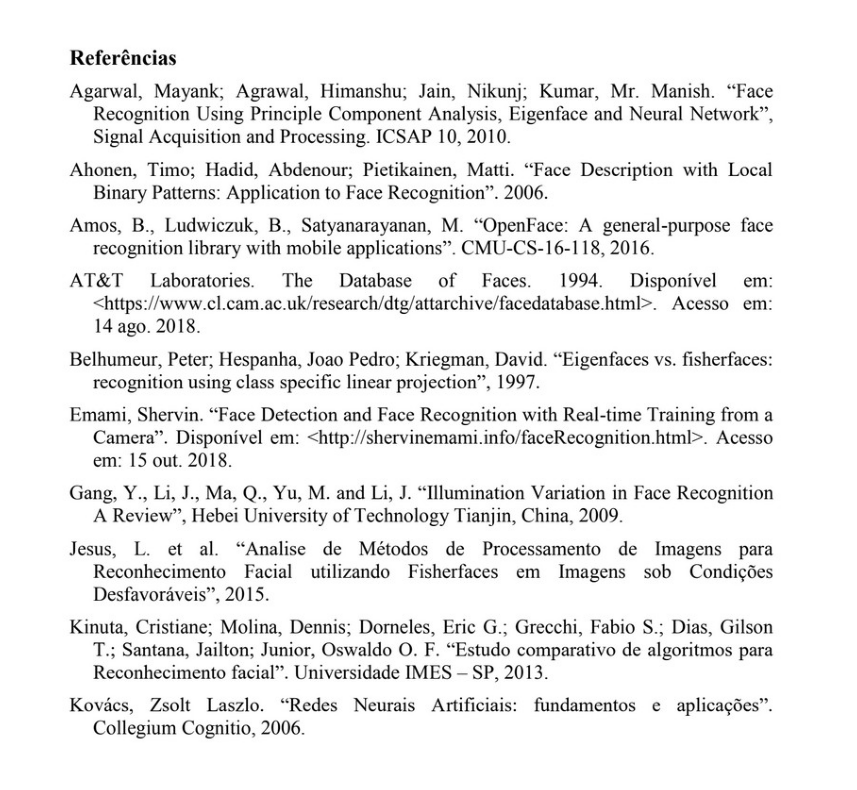

In [6]:
for imagem in path:
    img = cv2.imread(imagem)
    show_images(img)

## Configurando tesseract

In [7]:
config_tesseract = "--tessdata-dir ../tessdata"

In [16]:
def ocr_process(img, config_tesseract):
    text = pytesseract.image_to_string(img, lang="por", config=config_tesseract)
    return text

In [17]:
texto_completo = ""
nome_txt = "resultados_ocr.txt"

In [19]:
for imagem in path:
    img = cv2.imread(imagem)
    nome_imagem = os.path.split(imagem)[1]
    sep = "=" * 50 + "\n" + str(nome_imagem)
    text_completo = texto_completo + sep + "\n"
    texto_ocr = ocr_process(img, config_tesseract)
    texto_completo = texto_completo + texto_ocr + "\n"

In [21]:
print(texto_completo)

Tutorial: Introdução à Visão Computacional usando OpenCV

.A diferença entre a correlação e a convolução está na forma como a máscara é utilizada:
na correlação a operação é feita conforme indicado na Figura 10, já na operação de
convolução a máscara é rotacionada de 180 graus. Note que, se a máscara for simétrica as
operações de correlação e convolução são idênticas. As expressões que definem estas duas
Ooperações são apresentadas nas equações 8 e 9.

 

Correlação:
mp nl
g8(x,))= > D fOt+iy+j*w,j) &
m jn
Convolução:
mp nl o)
8(x,))= > V SG-iy-*wWi,j)
sa

  

onde w é a máscara utilizada no processo de correlação/convolução, e m e n são as
dimensões da máscara. O tipo de filtro depende dos valores da máscara, no geral, as
máscaras são simétricas e, portanto, pode-se aplicar tanto a convolução como a correlação.

Posição (x, y) = (4, 4)

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

Produto ponto a ponto
Máscara 3x 3
573 121 (1x5) (2x7) (1x3)
6 47 242 (2x6) (4x4) (2x7)
256 121 (1x

## Salvando em TXT

In [22]:
arquivo_txt = open(nome_txt, "w+")
arquivo_txt.write(texto_completo + "\n")
arquivo_txt.close()

# Busca por ocorrencias de palavras no arquivo .txt

- Suponha que queremos procurar por "computador"

In [24]:
termo_pesquisa = "computador"

with open("resultados_ocr.txt", "r") as arquivo:
    ocorrencias = [i.start() for i in re.finditer(termo_pesquisa, arquivo.read())]

In [26]:
# Quantas vezes a palavra "computador" aparece nesse arquivo
len(ocorrencias)

30

## Extração de entidades nomeadas com SpaCy

In [27]:
! python -m spacy download pt

⚠ As of spaCy v3.0, shortcuts like 'pt' are deprecated. Please use the
full pipeline package name 'pt_core_news_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 34.4 MB/s eta 0:00:00m eta 0:00:010:01:01

[notice] A new release of pip is available: 23.1.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [29]:
import spacy
pln = spacy.load("pt_core_news_sm")
pln

In [32]:
documento = pln(texto_completo)

In [35]:
from spacy import displacy
displacy.render(documento, style="ent", jupyter=True)

In [39]:
for entidade in documento.ents:
    if entidade.label_ == "LOC":
        print(entidade.text, entidade.label_)

Correlação LOC
Posição LOC
Máscara LOC
Resultado da Correlação R
Somatória
53 S+1443 LOC
6E LOC
Esquema LOC
Correlação LOC
Cls LOC
Revisão LOC
Dispositivos de E LOC
S. LOC
Barramentos LOC
Hardware LOC
US$ LOC
Referências

Agarwal LOC
Mayank LOC
Agrawal LOC
Himanshu LOC
Jain LOC
Kumar LOC
Ahonen LOC
Timo LOC
Hadid LOC
Amos LOC
B. LOC
B. LOC
M. “OpenFace LOC
Disponível LOC
Belhumeur LOC
Camera LOC
Gang LOC
Y. LOC
Li LOC
J. LOC
Ma LOC
Q. LOC
Yu LOC
M. and Li LOC
China LOC
Fisherfaces LOC
Santana LOC
Jailton LOC
Universidade IMES LOC
SP LOC
Correlação LOC
Posição LOC
Máscara LOC
Resultado da Correlação R
Somatória
53 S+1443 LOC
6E LOC
Esquema LOC
Correlação LOC
Cls LOC
Revisão LOC
Dispositivos de E LOC
S. LOC
Barramentos LOC
Hardware LOC
US$ LOC
Referências

Agarwal LOC
Mayank LOC
Agrawal LOC
Himanshu LOC
Jain LOC
Kumar LOC
Ahonen LOC
Timo LOC
Hadid LOC
Amos LOC
B. LOC
B. LOC
M. “OpenFace LOC
Disponível LOC
Belhumeur LOC
Camera LOC
Gang LOC
Y. LOC
Li LOC
J. LOC
Ma LOC
Q. LOC
Yu LOC
M. and 